In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
img_size = 224
data = []
categories = ['mammooty','mohanlal']

directories = ['./dataset/mammooty', './dataset/mohanlal']

for directory in directories:
    for img in os.listdir(directory):
        img_path = os.path.join(directory, img)
        category_label = directory.split('/')[-1]
        label = categories.index(category_label)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])
        
# Adds labels to images

In [3]:
random.shuffle(data)

In [4]:
x = []
y = []

for features, labels in data:
    x.append(features)
    y.append(labels)
    
# Seperating featuers and labels

In [5]:
x = np.array(x)
y = np.array(y)

# Array

In [6]:
x = x/255

# Normalisation

In [7]:
x.shape

(994, 224, 224, 3)

In [21]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D


# ResNet

In [9]:
from tensorflow.keras.applications import ResNet50

resnet = ResNet50(weights='./resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                 include_top=False, input_shape=(224, 224, 3))

In [10]:
model = Sequential()
model.add(resnet)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23850113 (90.98 MB)
Trainable params: 23796993 (90.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [13]:
history = model.fit(x, y, epochs=5, validation_split=0.2)

Epoch 1/5
25/25 [==============================] - 99s 4s/step - loss: 0.2937 - accuracy: 0.8830 - val_loss: 2175.7871 - val_accuracy: 0.7337
Epoch 2/5
25/25 [==============================] - 88s 4s/step - loss: 0.0880 - accuracy: 0.9748 - val_loss: 2.6284 - val_accuracy: 0.7337
Epoch 3/5
25/25 [==============================] - 86s 3s/step - loss: 0.0621 - accuracy: 0.9774 - val_loss: 366.9451 - val_accuracy: 0.7337
Epoch 4/5
25/25 [==============================] - 96s 4s/step - loss: 0.0400 - accuracy: 0.9912 - val_loss: 0.7095 - val_accuracy: 0.2663
Epoch 5/5
25/25 [==============================] - 86s 3s/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.6087 - val_accuracy: 0.7337


In [14]:
acc = model.evaluate(x,y)
print("Accuracy: ", (acc[1]*100))

32/32 [==============================] - 19s 579ms/step - loss: 0.6247 - accuracy: 0.7012
Accuracy:  70.12072205543518


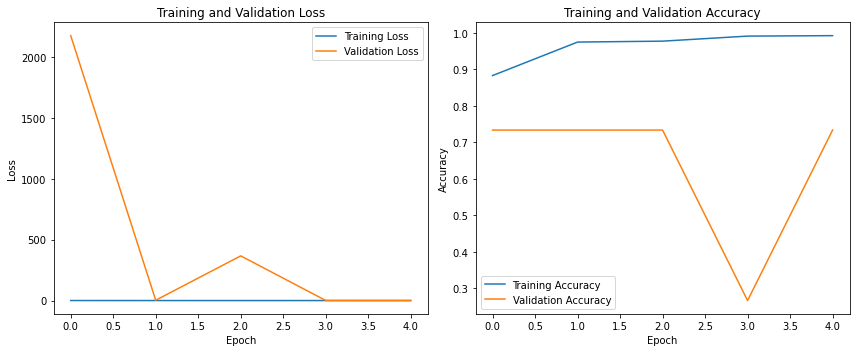

In [15]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
model.save('./ResNet.keras',save_format = 'h5')

In [17]:
model = load_model('ResNet.keras')

In [18]:
def load_image(path):
    img = cv2.imread(path)
    new_img = cv2.resize(img, (224,224))
    new_img = np.array(new_img)
    new_img = new_img.reshape(-1,224,224,3)
    return new_img

# Preprocessing user input image

1/1 [==============================] - 0s 43ms/step

 Prediction:  Mohanlal


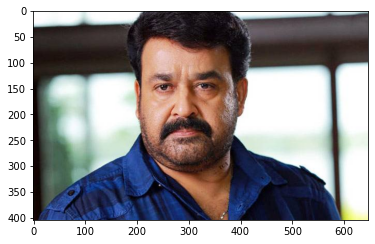

In [31]:
image = './test/mammooty.jpg'
image2 = './test/mohanlal.jpg'

img = image2

result = model.predict([load_image(img)])

if result[0][0] > 0.8:
    predict = 'Mohanlal'
else:
    predict = 'Mammooty'

print('\n Prediction: ',predict)
plt.imshow(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))